In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
df = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\dataframe_dimensionality_reduction.csv',  header=0, parse_dates=True, squeeze=True)

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Office_Hours,Working_day,Time_blocks_0,...,Temperature/HumidityRatio,Humidity/CO2,Humidity/Temperature,Humidity/HumidityRatio,HumidityRatio/Humidity,HumidityRatio/Temperature,HumidityRatio/CO2,CO2/Temperature,CO2/Humidity,CO2/HumidityRatio
0,23.7000,26.272,585.200000,749.200000,0.004764,1,14,1,1,0,...,4974.640851,0.035067,1.108523,5514.504828,0.000181,0.000201,0.000006,31.611814,28.517052,157257.423014
1,23.7180,26.290,578.400000,760.400000,0.004773,1,14,1,1,0,...,4969.554728,0.034574,1.108441,5508.457450,0.000182,0.000201,0.000006,32.060039,28.923545,159324.117354
2,23.7300,26.230,572.666667,769.666667,0.004765,1,14,1,1,0,...,4979.903526,0.034080,1.105352,5504.545702,0.000182,0.000201,0.000006,32.434331,29.342991,161519.837653
3,23.7225,26.125,493.750000,774.750000,0.004744,1,14,1,1,0,...,5000.765892,0.033721,1.101275,5507.219262,0.000182,0.000200,0.000006,32.658868,29.655502,163319.353995
4,23.7540,26.200,488.600000,779.000000,0.004767,1,14,1,1,0,...,4983.432615,0.033633,1.102972,5496.587291,0.000182,0.000201,0.000006,32.794477,29.732824,163429.064863


In [4]:
y_name = 'Light'
columns2remove = ['Occupancy','Office_Hours', 'Working_day', 'Time_blocks_0',
                  'Time_blocks_1', 'Time_blocks_2', 'Time_blocks_3', 'Hours'] #elimino le colonne binarie
df.drop(columns2remove, inplace=True, axis=1)

In [5]:
df.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Light/Temperature', 'Light/Humidity', 'Light/CO2',
       'Light/HumidityRatio', 'Temperature/CO2', 'Temperature/Humidity',
       'Temperature/HumidityRatio', 'Humidity/CO2', 'Humidity/Temperature',
       'Humidity/HumidityRatio', 'HumidityRatio/Humidity',
       'HumidityRatio/Temperature', 'HumidityRatio/CO2', 'CO2/Temperature',
       'CO2/Humidity', 'CO2/HumidityRatio'],
      dtype='object')

In [6]:
#normalizzazione
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = ['Temperature', 'Light', 'CO2', 'HumidityRatio', 'Humidity', 'Light/Temperature', 'Light/Humidity',
           'Light/CO2', 'Light/HumidityRatio', 'Temperature/CO2', 'Temperature/Humidity', 'Temperature/HumidityRatio',
           'Humidity/CO2', 'Humidity/Temperature', 'Humidity/HumidityRatio', 'HumidityRatio/Humidity',
           'HumidityRatio/Temperature', 'HumidityRatio/CO2', 'CO2/Temperature', 'CO2/Humidity', 'CO2/HumidityRatio']
scaler.fit(np.array(df[columns]))
df[columns] = scaler.transform(np.array(df[columns]))
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Light/Temperature,Light/Humidity,Light/CO2,Light/HumidityRatio,Temperature/CO2,...,Temperature/HumidityRatio,Humidity/CO2,Humidity/Temperature,Humidity/HumidityRatio,HumidityRatio/Humidity,HumidityRatio/Temperature,HumidityRatio/CO2,CO2/Temperature,CO2/Humidity,CO2/HumidityRatio
0,0.869029,0.418677,0.344793,0.202224,0.549737,0.330245,0.272107,0.230003,0.225972,0.508753,...,0.344612,0.334725,0.293219,0.110897,0.851950,0.451012,0.480619,0.155479,0.248921,0.162616
1,0.872357,0.419468,0.340787,0.208956,0.551972,0.326160,0.268761,0.223982,0.222949,0.498347,...,0.343482,0.327208,0.293155,0.107986,0.855677,0.452252,0.471543,0.161024,0.255321,0.167632
2,0.874576,0.416831,0.337409,0.214525,0.549997,0.322763,0.266706,0.219092,0.221087,0.489878,...,0.345781,0.319670,0.290775,0.106104,0.858092,0.449732,0.462155,0.165654,0.261926,0.172961
3,0.873190,0.412217,0.290912,0.217581,0.544374,0.278373,0.230876,0.187660,0.191479,0.484890,...,0.350416,0.314193,0.287633,0.107391,0.856441,0.444683,0.454649,0.168432,0.266847,0.177329
4,0.879014,0.415513,0.287877,0.220135,0.550376,0.275104,0.227814,0.184690,0.188574,0.481911,...,0.346565,0.312855,0.288941,0.102274,0.863016,0.448875,0.454196,0.170109,0.268065,0.177595


# Data Partitioning

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [8]:
attributes = [col for col in df.columns if col != y_name]
X = df[attributes].values
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# MULTIPLE Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-3.28053469e-01  3.89592331e-01  1.72037534e-01  1.53542158e+00
  9.32460796e-01  9.03622192e-01 -2.79410901e-03 -9.28690464e-01
  3.12869442e-03 -2.64800093e-02  2.58204984e-02 -2.18337573e-02
  1.22131062e+00 -3.13003253e-01  8.60573310e-03 -2.79835228e+00
  1.64952666e-02 -1.80591663e-01 -1.02678468e-01  1.07632410e-01]
Intercept: 
 0.21299609650987228


In [13]:
y_pred = reg.predict(X_test)

In [14]:
print('R2: %.3f' % r2_score(y_test, y_pred)) #coefficiente di determinazione
print('MSE: %.3f' % mean_squared_error(y_test, y_pred)) #errore quadratico medio
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred)) #errore assoluto medio

R2: 1.000
MSE: 0.000
MAE: 0.000


**LASSO**

di default si ha alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic'

In [15]:
param_list = {'alpha': [1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4]}

reg = Lasso()
grid_search = GridSearchCV(reg, param_grid=param_list, cv=100)
grid_search.fit(X, y)
reg = grid_search.best_estimator_

print(grid_search.best_params_)

{'alpha': 0.0001}


In [16]:
reg = Lasso(alpha=0.0001)
reg.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 0.          0.         -0.          0.          0.93998399  0.00872584
  0.          0.          0.          0.         -0.          0.
  0.         -0.          0.02441837  0.          0.00129947 -0.
 -0.         -0.        ]
Intercept: 
 -0.006687287400992281


In [18]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.998
MSE: 0.000
MAE: 0.003


**RIDGE**

In [19]:
param_list = {'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4,1e5]}

reg = Ridge()
grid_search = GridSearchCV(reg, param_grid=param_list, cv=100)
grid_search.fit(X, y)
reg = grid_search.best_estimator_

print(grid_search.best_params_)

{'alpha': 1e-05}


In [20]:
reg = Ridge(alpha = 0.00001)
reg.fit(X_train, y_train)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.39575433 -0.22817487  0.15872107  0.96591168  0.93240803  0.90402868
 -0.00263451 -0.92921498  0.00469088 -0.02750356  0.02044126 -0.02070324
  0.90602397 -0.33379067  0.05692832 -1.40982204  0.01378261 -0.16981916
 -0.09425632  0.10207985]
Intercept: 
 0.27312935279492695


In [22]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 1.000
MSE: 0.000
MAE: 0.000


## Linear Regression in 2 dimensions

In [23]:
y_name = 'Light'
# suddividi il dataset
attributes = ['Temperature']
X = df[attributes].values
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [24]:
reg = LinearRegression()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.475
MSE: 0.008
MAE: 0.071


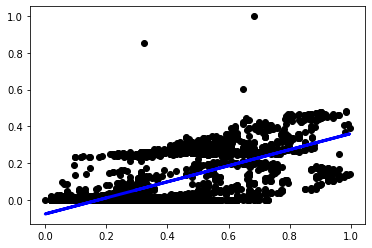

In [25]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

# Lasso

In [26]:
param_list = {'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4,1e5]}

reg = Lasso()
grid_search = GridSearchCV(reg, param_grid=param_list, cv=100)
grid_search.fit(X, y)
reg = grid_search.best_estimator_

print(grid_search.best_params_)

{'alpha': 1e-05}


In [34]:
reg = Lasso(alpha = 0.00001)
reg.fit(X_train.T[0].reshape(-1, 1), y_train)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.43740915]
Intercept: 
 -0.07737296570890533


In [36]:
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.475
MSE: 0.008
MAE: 0.071


# Ridge

In [30]:
param_list = {'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4,1e5]}

reg = Ridge()
grid_search = GridSearchCV(reg, param_grid=param_list, cv=100)
grid_search.fit(X, y)
reg = grid_search.best_estimator_

print(grid_search.best_params_)

{'alpha': 1e-05}


In [37]:
reg = Ridge(alpha = 0.00001)
reg.fit(X_train.T[0].reshape(-1, 1), y_train)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.4376723]
Intercept: 
 -0.07746565142229982


In [39]:
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.475
MSE: 0.008
MAE: 0.071
